In [1]:
import os
import glob
import json
import pandas as pd
import numpy as np


In [2]:
json_folder = '10K_item1a_PERMNO'
json_files = glob.glob(os.path.join(json_folder, "*.json"))
df = []
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        df.append(data)
df1 = pd.json_normalize(df)
df1['filing_date'] = pd.to_datetime(df1['filing_date'], errors='coerce')
df1['year'] = df1['filing_date'].dt.year
def map_industry(sic):
    if 1 <= sic <= 999:
        return 'Agriculture, Forestry and Fishing'
    elif 1000 <= sic <= 1499:
        return 'Mining'
    elif 1500 <= sic <= 1799:
        return 'Construction'
    elif 2000 <= sic <= 3999:
        return 'Manufacturing'
    elif 4000 <= sic <= 4999:
        return 'Transportation and other Utilities'
    elif 5000 <= sic <= 5199:
        return 'Wholesale Trade'
    elif 5200 <= sic <= 5999:
        return 'Retail Trade'
    elif 6000 <= sic <= 6799:
        return 'Finance, Insurance and Real Estate'
    elif 7000 <= sic <= 8999:
        return 'Services'
    elif 9000 <= sic <= 9999:
        return 'Public Administration'
    else:
        return 'Unknown'
df2 = pd.read_csv('MSF_1996_2023.csv')
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
df2['year'] = df2['date'].dt.year
df2['SICCD'] = pd.to_numeric(df2['SICCD'], errors='coerce')
df2['vwretd'] = pd.to_numeric(df2['vwretd'], errors='coerce')
df2.dropna(subset=['SICCD'], inplace=True)
merged_df = pd.merge(df1, df2, on=['PERMNO', 'year'], how='inner')
merged_df['industry'] = merged_df['SICCD'].apply(map_industry)
sampled_df = merged_df.groupby(['year', 'industry']).apply(lambda x: x.sample(min(10, len(x)))).reset_index(drop=True)
sampled_df


/var/folders/_m/1_9st6953jb89bcn92vcqxph0000gn/T/ipykernel_1670/1729233751.py:34: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('MSF_1996_2023.csv')


,cik,company,filing_type,filing_date,item_1A,PERMNO,year,date,SHRCD,SICCD,...,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,RETX,vwretd,industry
0,732485,GENZYME CORP,10-K,1996-04-01,ITEM 1A. EXECUTIVE OFFICERS OF THE REGISTRANT\...,10324,1996,1996-01-31,11,2836.0,...,75.875,75.87500,201577.0,0.216433,75.75000,76.00000,31133.0,0.216433,0.028121,Manufacturing
1,732485,GENZYME CORP,10-K,1996-04-01,ITEM 1A. EXECUTIVE OFFICERS OF THE REGISTRANT\...,10324,1996,1996-03-29,11,2836.0,...,74.500,55.00000,337441.0,-0.202899,55.00000,55.50000,33642.0,-0.202899,0.010914,Manufacturing
2,730469,A L PHARMA INC,10-K,1996-03-22,Item 1A. Executive Officers of the Registrant\...,65832,1996,1996-02-29,11,2834.0,...,27.250,25.62500,8273.0,-0.050926,25.25000,26.25000,13424.0,-0.050926,0.016353,Manufacturing
3,730469,A L PHARMA INC,10-K,1996-03-22,Item 1A. Executive Officers of the Registrant\...,65832,1996,1996-11-29,11,2834.0,...,12.750,12.75000,18952.0,0.020000,12.37500,12.87500,13499.0,0.020000,0.065594,Manufacturing
4,732485,GENZYME CORP,10-K,1996-04-01,ITEM 1A. EXECUTIVE OFFICERS OF THE REGISTRANT\...,10324,1996,1996-06-28,11,2836.0,...,58.000,50.25000,85194.0,-0.137339,50.25000,50.50000,33642.0,-0.137339,-0.008289,Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,1665918,US Foods Holding Corp.,10-K,2022-02-17,Item 1A. Risk Factors\nWe are subject to many ...,16084,2022,2022-12-30,11,5149.0,...,36.160,34.02000,249533.0,-0.069984,34.02000,34.03000,224891.0,-0.069984,-0.057119,Wholesale Trade
2507,900075,COPART INC,10-K,2022-09-27,Item 1A. Risk Factors\nInvesting in our common...,80320,2022,2022-05-31,11,5010.0,...,118.830,114.53000,276286.0,0.007743,114.51000,114.63000,237673.0,0.007743,-0.002113,Wholesale Trade
2508,701719,Envela Corp,10-K,2022-03-16,Item 1A\nITEM 1A. RISK FACTORS\nOur operations...,10028,2022,2022-03-31,11,5094.0,...,4.720,4.66000,7468.0,0.117506,4.66000,4.72000,26925.0,0.117506,0.030506,Wholesale Trade
2509,1301787,BlueLinx Holdings Inc.,10-K,2022-02-22,ITEM 1A. RISK FACTORS\nIn addition to the othe...,90496,2022,2022-11-30,11,5031.0,...,70.500,69.40000,18052.0,-0.015044,69.39000,69.40000,9035.0,-0.015044,0.052354,Wholesale Trade


In [3]:
relevant_keywords = {
    'Attack': ['cyber', 'networks', 'systems', 'products', 'services', 'datacenter', 'infrastructure'],
    'Threat': ['cyber', 'networks', 'systems', 'products', 'services', 'datacenter', 'infrastructure'],
    'Computer': ['malware', 'virus', 'viruses', 'intrusions'],
    'information system': ['malware', 'virus', 'viruses', 'intrusions'],
    'Malicious': ['software', 'programs', 'third parties', 'attacks'],
    'Breaches': ['software', 'programs', 'third parties', 'attacks'],
    'Hacker': ['software', 'programs', 'third parties', 'attacks'],
    'hacking': ['software', 'programs', 'third parties', 'attacks'],
    'social engineering': ['software', 'programs', 'third parties', 'attacks'],
    'denial of service': ['software', 'programs', 'third parties', 'attacks'],
    'cyberattack': ['software', 'programs', 'third parties', 'attacks'],
    'cybersecurity': ['software', 'programs', 'third parties', 'attacks']
}

irrelevant_keywords = {
    'Attack': ['terror', 'war', 'contraband', 'bombs'],
    'Threat': ['terror', 'simulator', 'disease', 'legal action', 'competitors'],
    'Computer': ['fires', 'product sales', 'warranty claim'],
    'information system': ['malware', 'virus', 'viruses', 'intrusions'],
    'Breaches': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'Malicious': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'Hacker': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'hacking': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'social engineering': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'denial of service': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'cyberattack': ['fiduciary duty', 'covenant', 'credit', 'agreement'],
    'cybersecurity': ['fiduciary duty', 'covenant', 'credit', 'agreement']
}

sentences = []
for i in sampled_df['item_1A']:
    relevant_hits = []
    irrelevant_hits = []
    for sentence in i.split('\n'):
        found_relevant = False
        for category, keywords in relevant_keywords.items():
            if category.lower() in sentence.lower():
                found_relevant = True
                break
        if found_relevant:
            for category, keywords in irrelevant_keywords.items():
                if category.lower() in sentence.lower():
                    if any(keyword.lower() in sentence.lower() for keyword in keywords):
                        found_relevant = False
                        break
        if found_relevant:
            relevant_hits.append(sentence)
        else:
            irrelevant_hits.append(sentence)
    sentences.append([relevant_hits, irrelevant_hits])

sampled_df['relevant,irrelevant'] = sentences
sampled_df['relevant,irrelevant']

0       [[], [ITEM 1A. EXECUTIVE OFFICERS OF THE REGIS...
1       [[], [ITEM 1A. EXECUTIVE OFFICERS OF THE REGIS...
2       [[], [Item 1A. Executive Officers of the Regis...
3       [[], [Item 1A. Executive Officers of the Regis...
4       [[], [ITEM 1A. EXECUTIVE OFFICERS OF THE REGIS...
                              ...                        
2506    [[A cybersecurity incident may negatively affe...
2507    [[Litigation based on allegations of infringem...
2508    [[The coronavirus pandemic continues to be ser...
2509    [[The integration of acquisitions can involve ...
2510    [[We rely extensively on our information techn...
Name: relevant,irrelevant, Length: 2511, dtype: object

In [4]:
print(sampled_df['item_1A'][0])

ITEM 1A. EXECUTIVE OFFICERS OF THE REGISTRANT
The current executive officers of the Company are as follows:
Each officer's term of office extends until the meeting of the Board of Directors following the next annual meeting of stockholders and until a successor is elected and qualified or until his earlier resignation or removal.
Mr. Termeer has served as President and a Director of the Company since October 1983, as Chief Executive Officer since December 1985 and as Chairman of the Board since May 1988. For ten years prior to joining the Company, Mr.
Termeer worked for Baxter Travenol Laboratories, Inc., a manufacturer of human health care products. Mr. Termeer is Chairman of the Boards of GTC and Neozyme II. Mr. Termeer is also a director of Abiomed, Inc., AutoImmune Inc., GelTex Pharmaceuticals, Inc. and Xenova Ltd. and a trustee of Hambrecht & Quist Healthcare Investors and Hambrecht & Quist Life Sciences Investors.
Dr. Cox joined the Company in June 1984 and has served as Senior V

In [5]:
import json
import os
import shutil

output_folder = 'extracted_sentences'
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)

os.makedirs(output_folder, exist_ok=True)


for index, row in sampled_df.iterrows():
    extracted_data = {
        'PERMNO': row['PERMNO'],
        'filing_date': row['filing_date'].strftime('%Y-%m-%d'),
        'industry': row['industry'],
        'relevant_sentences': row['relevant,irrelevant'][0],
        'irrelevant_sentences': row['relevant,irrelevant'][1]
    }
    
    file_name = f"extracted_sentences_{row['PERMNO']}_{row['filing_date'].strftime('%Y-%m-%d')}.json"
    output_file = os.path.join(output_folder, file_name)
    
    with open(output_file, 'w') as f:
        json.dump(extracted_data, f, indent=4)

    print(f"Saved extracted sentences to {output_file}")


Saved extracted sentences to extracted_sentences/extracted_sentences_10324_1996-04-01.json
Saved extracted sentences to extracted_sentences/extracted_sentences_10324_1996-04-01.json
Saved extracted sentences to extracted_sentences/extracted_sentences_65832_1996-03-22.json
Saved extracted sentences to extracted_sentences/extracted_sentences_65832_1996-03-22.json
Saved extracted sentences to extracted_sentences/extracted_sentences_10324_1996-04-01.json
Saved extracted sentences to extracted_sentences/extracted_sentences_81487_1996-02-07.json
Saved extracted sentences to extracted_sentences/extracted_sentences_43327_1996-03-29.json
Saved extracted sentences to extracted_sentences/extracted_sentences_41355_1996-09-30.json
Saved extracted sentences to extracted_sentences/extracted_sentences_81487_1996-02-07.json
Saved extracted sentences to extracted_sentences/extracted_sentences_43887_1996-03-26.json
Saved extracted sentences to extracted_sentences/extracted_sentences_38172_1996-04-01.json

In [6]:
def calculate_cybersecurity_risk(row):
    total_sentences = len(row['relevant,irrelevant'][0]) + len(row['relevant,irrelevant'][1])
    relevant_sentences_count = len(row['relevant,irrelevant'][0])
    proportion_cybersecurity = relevant_sentences_count / total_sentences if total_sentences > 0 else 0
    count_cybersecurity = relevant_sentences_count
    return pd.Series([proportion_cybersecurity, count_cybersecurity])

sampled_df[['cybersecurity_proportion', 'cybersecurity_count']] = sampled_df.apply(calculate_cybersecurity_risk, axis=1)

sampled_df[['PERMNO', 'filing_date', 'cybersecurity_proportion', 'cybersecurity_count']]


,PERMNO,filing_date,cybersecurity_proportion,cybersecurity_count
0,10324,1996-04-01,0.000000,0.0
1,10324,1996-04-01,0.000000,0.0
2,65832,1996-03-22,0.000000,0.0
3,65832,1996-03-22,0.000000,0.0
4,10324,1996-04-01,0.000000,0.0
...,...,...,...,...
2506,16084,2022-02-17,0.042017,5.0
2507,80320,2022-09-27,0.017544,3.0
2508,10028,2022-03-16,0.090909,6.0
2509,90496,2022-02-22,0.017045,3.0


In [7]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(group):
    stats_dict = {
        'N': group.count(),
        'Mean': group.mean(),
        'Std': group.std(),
        'Skewness': stats.skew(group, nan_policy='omit'),
        'Kurtosis': stats.kurtosis(group, nan_policy='omit'),
        'Min': group.min(),
        'Max': group.max(),
        '1%': group.quantile(0.01),
        '5%': group.quantile(0.05),
        '25%': group.quantile(0.25),
        '50%': group.median(),
        '75%': group.quantile(0.75),
        '95%': group.quantile(0.95),
        '99%': group.quantile(0.99),
    }
    return pd.Series(stats_dict)

descriptive_stats_by_industry = sampled_df.groupby('industry')['cybersecurity_proportion'].apply(descriptive_stats).unstack()

descriptive_stats_by_industry


,N,Mean,Std,Skewness,Kurtosis,Min,Max,1%,5%,25%,50%,75%,95%,99%
industry,,,,,,,,,,,,,,
"Agriculture, Forestry and Fishing",170.0,0.011910,0.015326,1.658191,2.707177,0.0,0.066667,0.0,0.0,0.0,0.006154,0.018434,0.048294,0.062500
Construction,180.0,0.011056,0.014413,1.657375,2.810581,0.0,0.072289,0.0,0.0,0.0,0.007519,0.015255,0.042568,0.061224
"Finance, Insurance and Real Estate",240.0,0.024202,0.039003,4.775312,37.016019,0.0,0.400000,0.0,0.0,0.0,0.012410,0.032000,0.083333,0.176471
Manufacturing,270.0,0.018674,0.039419,4.178881,21.219464,0.0,0.285714,0.0,0.0,0.0,0.003031,0.019902,0.087500,0.250000
Mining,270.0,0.006441,0.012126,3.201862,14.371198,0.0,0.095238,0.0,0.0,0.0,0.000000,0.008541,0.030000,0.054500
Public Administration,170.0,0.012581,0.014993,2.039482,5.549077,0.0,0.089744,0.0,0.0,0.0,0.007648,0.018123,0.039285,0.067538
Retail Trade,270.0,0.019719,0.025611,1.723294,3.249790,0.0,0.136364,0.0,0.0,0.0,0.011634,0.028571,0.070976,0.111111
Services,270.0,0.025236,0.036880,2.444977,6.701504,0.0,0.200000,0.0,0.0,0.0,0.013637,0.033333,0.110330,0.168154
Transportation and other Utilities,260.0,0.012707,0.019987,2.329078,6.966774,0.0,0.131579,0.0,0.0,0.0,0.000000,0.018182,0.050473,0.085865


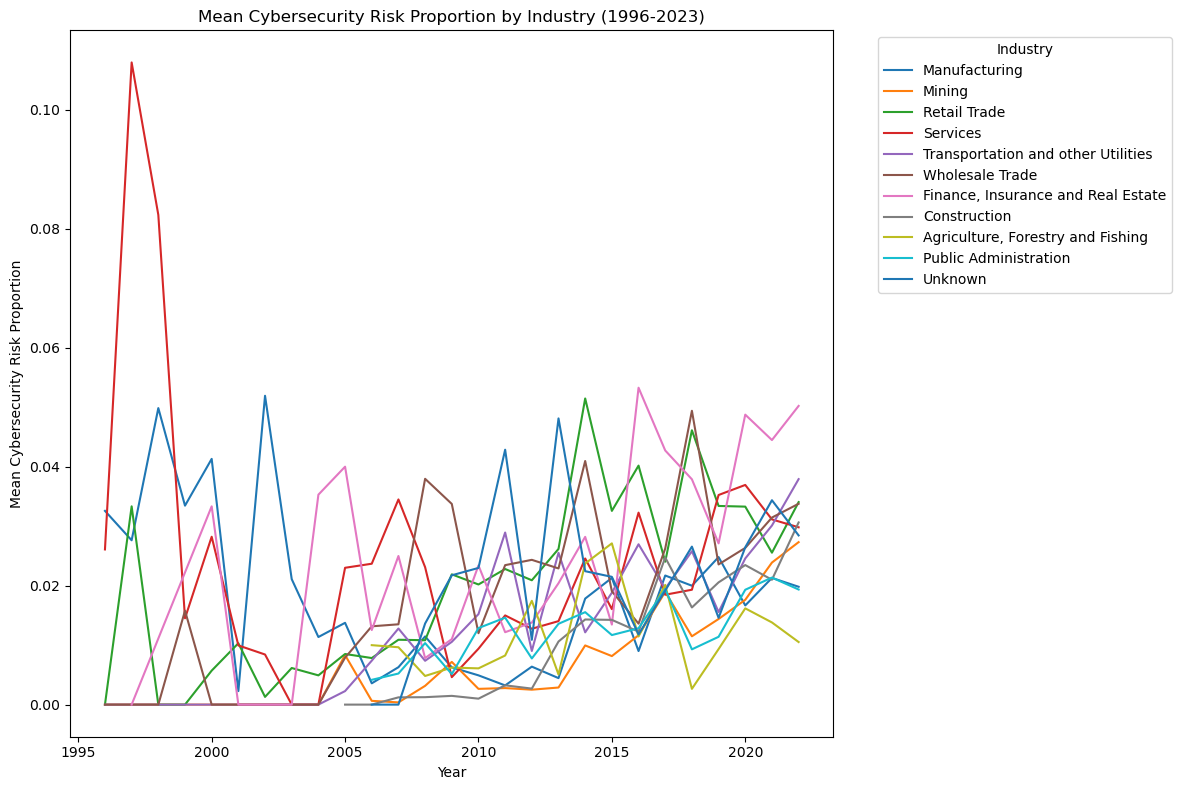

In [8]:
import matplotlib.pyplot as plt

mean_std_by_industry_year = sampled_df.groupby(['year', 'industry'])['cybersecurity_proportion'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(12, 8))
for industry in mean_std_by_industry_year['industry'].unique():
    industry_data = mean_std_by_industry_year[mean_std_by_industry_year['industry'] == industry]
    plt.plot(industry_data['year'], industry_data['mean'], label=industry)

plt.title('Mean Cybersecurity Risk Proportion by Industry (1996-2023)')
plt.xlabel('Year')
plt.ylabel('Mean Cybersecurity Risk Proportion')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Available Quintiles: [1, 2, 3]
Equal-Weighted Excess Returns by Quintile:
 quintile         1         2         3
year                                  
1996     -0.005947       NaN -0.008176
1997      0.004361       NaN  0.004444
1998     -0.000697       NaN -0.053517
1999      0.003107       NaN  0.010181
2000     -0.026153 -0.044449 -0.015009
2001     -0.018922  0.003084       NaN
2002     -0.039759 -0.016724 -0.017981
2003      0.005466 -0.022648 -0.001316
2004     -0.014997 -0.013162 -0.014196
2005     -0.010416 -0.002122 -0.012721
2006     -0.007272 -0.010166 -0.003332
2007     -0.012683 -0.016991 -0.013968
2008     -0.062421 -0.068402 -0.050961
2009      0.017956  0.008966  0.029768
2010      0.005332  0.011668 -0.021107
2011     -0.017426 -0.027476 -0.034276
2012     -0.009524  0.000392 -0.003517
2013      0.000850  0.000301 -0.003445
2014     -0.012429 -0.006614 -0.015488
2015     -0.019126 -0.019149 -0.015255
2016     -0.011584 -0.014920 -0.014749
2017     -0.005981 -0.004258

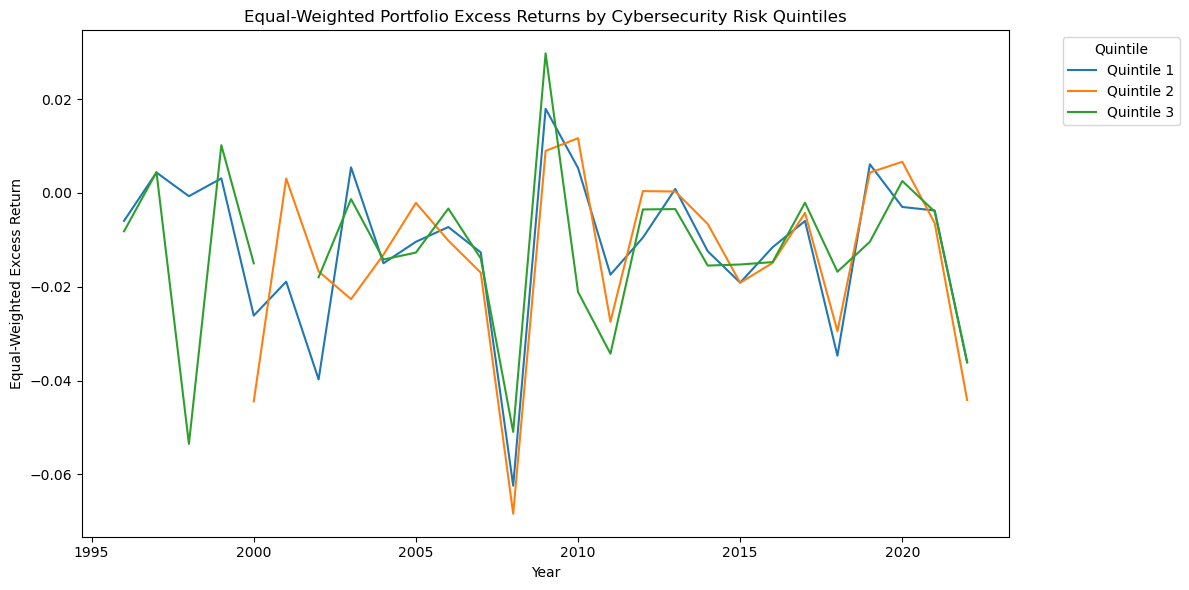

One or both of the quintiles (5 and 1) are not available for comparison.
This may be due to a lack of unique values in the cybersecurity risk measure, resulting in insufficient data to form quintiles 5 and 1. It could also indicate that companies with high and low cybersecurity risk do not have enough representation in the sample, leading to missing data for those quintiles.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming sampled_df is already defined and contains 'year', 'cybersecurity_proportion', and 'vwretd'

# Step 5.1: Equal-Weighted Portfolio Returns

# Sort into quintiles based on cybersecurity risk measure (cybersecurity_proportion)
sampled_df['quintile'] = pd.qcut(sampled_df['cybersecurity_proportion'], 5, labels=False, duplicates='drop') + 1

# Initialize a DataFrame to store equal-weighted returns for each quintile
equal_weighted_returns = sampled_df.groupby(['year', 'quintile'])['vwretd'].mean().reset_index()

# Calculate the excess return for each quintile
risk_free_rate = 0.02  # Example risk-free rate; adjust as necessary
equal_weighted_returns['excess_return'] = equal_weighted_returns['vwretd'] - risk_free_rate

# Pivot the DataFrame to get a clearer view of the returns per quintile per year
pivot_returns = equal_weighted_returns.pivot(index='year', columns='quintile', values='excess_return')

# Check the available quintiles
available_quintiles = pivot_returns.columns.tolist()
print("Available Quintiles:", available_quintiles)

# Compute the difference between portfolio 5 (high cybersecurity risk) and portfolio 1 (low cybersecurity risk)
if 5 in available_quintiles and 1 in available_quintiles:
    high_minus_low = pivot_returns[5] - pivot_returns[1]
else:
    high_minus_low = None

# Output the results
print("Equal-Weighted Excess Returns by Quintile:\n", pivot_returns)

# Plot the equal-weighted excess returns for each quintile
plt.figure(figsize=(12, 6))

# Plot the returns for each available quintile
for quintile in available_quintiles:
    plt.plot(pivot_returns.index, pivot_returns[quintile], label=f'Quintile {quintile}')

if high_minus_low is not None:
    plt.plot(pivot_returns.index, high_minus_low, label='High - Low (Q5 - Q1)', color='black', linestyle='--')

plt.title('Equal-Weighted Portfolio Excess Returns by Cybersecurity Risk Quintiles')
plt.xlabel('Year')
plt.ylabel('Equal-Weighted Excess Return')
plt.legend(title='Quintile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Provide comments on the observations
if high_minus_low is None:
    print("One or both of the quintiles (5 and 1) are not available for comparison.")
    
    # Reason for insufficient data
    print("This may be due to a lack of unique values in the cybersecurity risk measure, "
          "resulting in insufficient data to form quintiles 5 and 1. It could also indicate "
          "that companies with high and low cybersecurity risk do not have enough representation "
          "in the sample, leading to missing data for those quintiles.")
else:
    mean_high_minus_low = high_minus_low.mean()
    std_high_minus_low = high_minus_low.std()

    print(f"\nAverage high minus low return: {mean_high_minus_low:.4f}")
    print(f"Standard deviation of high minus low return: {std_high_minus_low:.4f}")

    if mean_high_minus_low > 0:
        print("The high cybersecurity risk portfolio (Q5) tends to outperform the low risk portfolio (Q1) on average.")
    else:
        print("The low cybersecurity risk portfolio (Q1) tends to outperform the high risk portfolio (Q5) on average.")


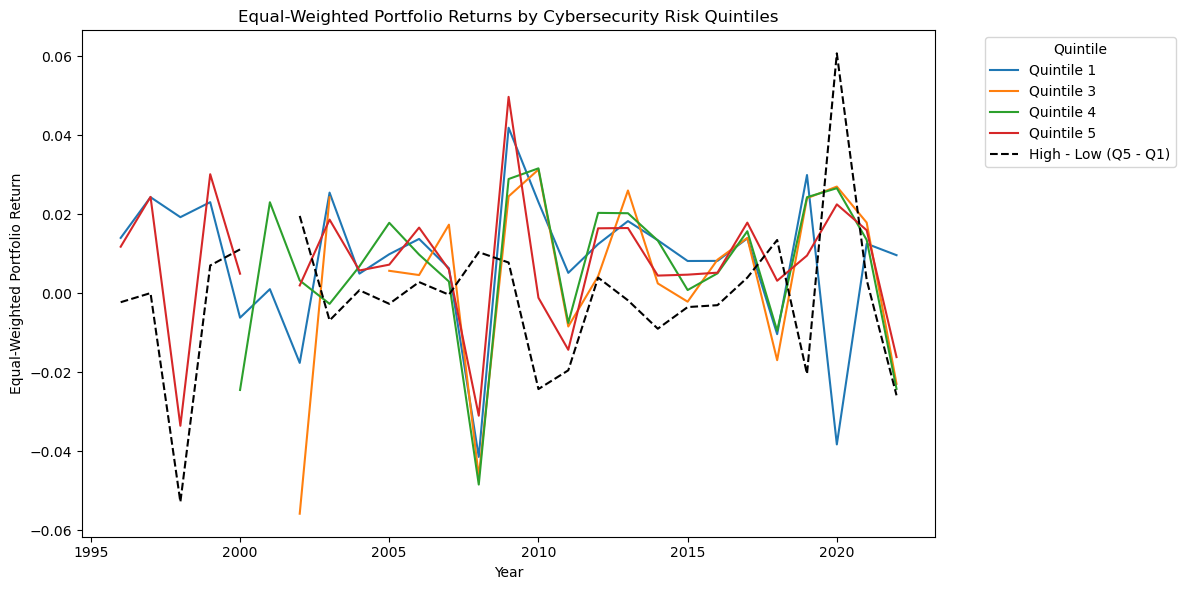

High minus Low (Q5 - Q1) Returns:
 year
1996   -0.002229
1997    0.000083
1998   -0.052820
1999    0.007074
2000    0.011144
2001         NaN
2002    0.019617
2003   -0.006838
2004    0.000802
2005   -0.002638
2006    0.002870
2007   -0.000331
2008    0.010444
2009    0.007820
2010   -0.024221
2011   -0.019478
2012    0.004003
2013   -0.001756
2014   -0.008945
2015   -0.003462
2016   -0.002981
2017    0.003989
2018    0.013525
2019   -0.020391
2020    0.060785
2021    0.003426
2022   -0.025804
dtype: float64


In [10]:
sampled_df = sampled_df.sort_values(by='cybersecurity_proportion')

quantiles = sampled_df['cybersecurity_proportion'].quantile([0.2, 0.4, 0.6, 0.8]).values

def assign_quintile(x):
    if x <= quantiles[0]:
        return 1
    elif x <= quantiles[1]:
        return 2
    elif x <= quantiles[2]:
        return 3
    elif x <= quantiles[3]:
        return 4
    else:
        return 5

sampled_df['quintile'] = sampled_df['cybersecurity_proportion'].apply(assign_quintile)

equal_weighted_returns = sampled_df.groupby(['year', 'quintile'])['vwretd'].mean().unstack()

high_minus_low = equal_weighted_returns[5] - equal_weighted_returns[1]

plt.figure(figsize=(12, 6))

for quintile in equal_weighted_returns.columns:
    plt.plot(equal_weighted_returns.index, equal_weighted_returns[quintile], label=f'Quintile {quintile}')

plt.plot(equal_weighted_returns.index, high_minus_low, label='High - Low (Q5 - Q1)', color='black', linestyle='--')

plt.title('Equal-Weighted Portfolio Returns by Cybersecurity Risk Quintiles')
plt.xlabel('Year')
plt.ylabel('Equal-Weighted Portfolio Return')
plt.legend(title='Quintile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("High minus Low (Q5 - Q1) Returns:\n", high_minus_low)
